In [1]:
import pandas as pd

data = pd.read_csv("kommune_clean.csv")
data.head()

data = data.drop("Unnamed: 0",axis=1) #remove this column that was added when I saved the file

In [2]:
data.shape

(3359, 96)

In [3]:
data.head()

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,6.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,5.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0


In [4]:
numerical_8 = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2","Q66a_1"]

numerical_7_9999 = ['Q5_1', 'Q6_1', 'Q7_1', 'Q10_1'] 

numerical = ['Id', 'Q53a', 'Q54a'] 
#remember to not include 'Id' in the models

bool_unsure = ['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q18']

categorical = ['Spraak', 'Q16', 'Q46a', 'Q48a','Q52a', 'Q60a', 'Q62a', 'Alderkat', 'Q56a', 
               'Q61a', 'Kommunestr', 'Fylke', 'Q49a', 'Sentralitet', 'Q57a', 'Q58a', 'Q63a', 
               'Q67a']

#TODO I need to one-hot-encode these before training models.
one_hot_encode = ['Spraak', 'Q57a', 'Q46a', 'Q48a', 'Q52a', 'Q60a', 'Q58a', 'Q62a', 'Q56a', 'Fylke', 'Q58a']

# TODO i need to use imputation on these
remove_unsure = ['Q61a','Q63a','Q67a']

boolean = ['Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q64a_1', 'Q64a_2', 'Q64a_3', 
           'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 
           'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q68a']

Feature imputation: 
https://scikit-learn.org/stable/modules/impute.html#impute

## Unvariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer

### For 1-8 vars where I want to remove the 8 values

#### Using median

In [6]:
#fixing nan values in the entire set
imp = SimpleImputer(missing_values=np.nan, strategy='median')
median_nan = imp.fit_transform(data[numerical_8])

In [7]:
#fixing 9999 values in the entire set
imp = SimpleImputer(missing_values=8, strategy='median')
median_8 = imp.fit_transform(median_nan)

In [8]:
data_unvariate = data.copy()
data_unvariate[numerical_8] = median_8
pd.DataFrame(data_unvariate).head(20)

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,5.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0
5,2.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,...,2.0,12,5.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0
6,1.0,7.0,7.0,7.0,6.0,6.0,4.0,4.0,4.0,4.0,...,2.0,8,5.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0
7,1.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,4.0,2.0,...,4.0,3,4.0,4.0,1.0,1.0,4.0,1.0,4.0,2.0
8,1.0,4.0,6.0,5.0,6.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2,4.0,4.0,NaN,0.0,4.0,1.0,1.0,0.0
9,1.0,7.0,7.0,7.0,7.0,7.0,6.0,4.0,7.0,7.0,...,1.0,18,5.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0


#### Evaluate the three different and which one should I use?

In [9]:
#I'll just use median. especially since the data is scewed.
#but how can I evaluate how well it worked so I can compare it to multivariate feature imputation?

In [10]:
data.shape

(3359, 96)

In [12]:
#when using all the years. These features were only in the dataset for 2019
#data = data.drop("Id",axis=1)
#data = data.drop("Q67a",axis=1)
#data = data.drop("Sentralitet",axis=1)
#data = data.drop("Kommunestr",axis=1)
#data = data.drop("Spraak",axis=1)
#data = data.drop("Q9_7",axis=1)

## Multivariate feature imputation

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [13]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [14]:
data[numerical_7_9999] = data[numerical_7_9999].replace(9999.0, np.NaN)
data[numerical_8] = data[numerical_8].replace(8.0, np.NaN)
data[bool_unsure] = data[bool_unsure].replace(3.0, np.NaN)

In [15]:
imp = IterativeImputer(missing_values=np.nan, max_iter=10, random_state=0)
multivariate_nan = imp.fit_transform(data[numerical_8+numerical_7_9999+bool_unsure])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [16]:
data_multivariate = data.copy()
data_multivariate[numerical_8+numerical_7_9999+bool_unsure] = multivariate_nan
pd.DataFrame(data_multivariate).head(10)

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.00000,6.000000,6.0,6.0,4.000000,6.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1.0,5.0,3.0,3.0,6.00000,4.000000,6.0,4.0,5.000000,6.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,1.0,7.0,6.0,6.0,6.00000,6.000000,4.0,5.0,6.011713,6.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,1.0,6.0,6.0,3.0,3.00000,2.000000,2.0,2.0,4.000000,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,1.0,4.0,7.0,6.0,5.00000,5.000000,5.0,1.0,6.000000,5.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0
5,2.0,7.0,7.0,7.0,6.00000,6.000000,5.0,5.0,5.000000,5.0,...,2.0,12,5.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0
6,1.0,7.0,7.0,7.0,6.00000,5.746992,4.0,4.0,4.000000,4.0,...,2.0,8,5.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0
7,1.0,6.0,2.0,6.0,2.00000,2.000000,6.0,6.0,4.000000,2.0,...,4.0,3,4.0,4.0,1.0,1.0,4.0,1.0,4.0,2.0
8,1.0,4.0,6.0,5.0,2.87921,3.000000,3.0,2.0,3.000000,3.0,...,3.0,2,4.0,4.0,NaN,0.0,4.0,1.0,1.0,0.0
9,1.0,7.0,7.0,7.0,7.00000,7.000000,6.0,4.0,7.000000,7.0,...,1.0,18,5.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0


In [17]:
data_multivariate.shape

(3359, 96)

In [18]:
data_multivariate.to_csv("kommune_multivariate.csv")

In [29]:
data_multivariate = data_multivariate.drop(['Id'],axis=1)
data_multivariate = data_multivariate.drop(['Unnamed: 0'],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
print(data_multivariate.shape)
data_multivariate = data_multivariate.dropna() #just doing this for now, as I cant be bothered to deal with it
print(data_multivariate.shape)

import math
data_multivariate = data_multivariate.iloc[np.random.permutation(len(data_multivariate))]

data_multivariate = data_multivariate[data_multivariate.Q16 != 11.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 12.0]
data_multivariate = data_multivariate[data_multivariate.Q16 != 13.0]

dev_test = data_multivariate[:100] 
#final_test = data[370:740] # maybe I should not priorotize having thissince my data is so small?
train = data_multivariate[100:]

from sklearn import tree

target = train["Q16"]
train_x = train.drop(['Q16'],axis=1).values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, target)

predictions = clf.predict(dev_test.drop(['Q16'],axis=1).values)
target = list(dev_test['Q16'])

#accuracy = math.fsum(1 for x,y in zip(predictions,target) if x == y) / len(predictions)
#print(accuracy)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(target, predictions))


from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(target, predictions)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

In [ ]:
# TODO check what the accuracy is if I look at the top 2 predictions for each. (check if this is even statistically interesting information)

# What other ways can i evaluate my model?

[Text(451.09807983586137, 1063.5652173913045, 'Kommunestr <= 2.5\ngini = 0.821\nsamples = 2307\nvalue = [627, 212, 636, 102, 128, 69, 189, 163, 121, 60]'),
 Text(238.0493026412737, 1016.2956521739131, 'Q58a <= 1.5\ngini = 0.819\nsamples = 726\nvalue = [208, 78, 154, 44, 15, 11, 131, 42, 27, 16]'),
 Text(173.7085809360584, 969.0260869565218, 'Q64a_8 <= 0.5\ngini = 0.825\nsamples = 520\nvalue = [126, 62, 134, 35, 14, 7, 84, 26, 21, 11]'),
 Text(93.15678257944643, 921.7565217391304, 'Q61a <= 4.5\ngini = 0.817\nsamples = 489\nvalue = [125, 61, 128, 21, 13, 7, 79, 25, 20, 10]'),
 Text(43.34796258329062, 874.4869565217392, 'Q19_2 <= 5.745\ngini = 0.836\nsamples = 131\nvalue = [33, 19, 17, 5, 2, 5, 29, 11, 7, 3]'),
 Text(17.875448487954895, 827.2173913043479, 'Q1_arbeid_kom_3 <= 4.482\ngini = 0.861\nsamples = 43\nvalue = [8, 2, 7, 1, 2, 5, 6, 8, 3, 1]'),
 Text(10.01025115325474, 779.9478260869566, 'Q1_natur_kom_2 <= 5.5\ngini = 0.786\nsamples = 23\nvalue = [6, 0, 3, 1, 1, 4, 0, 7, 0, 1]'),
 T

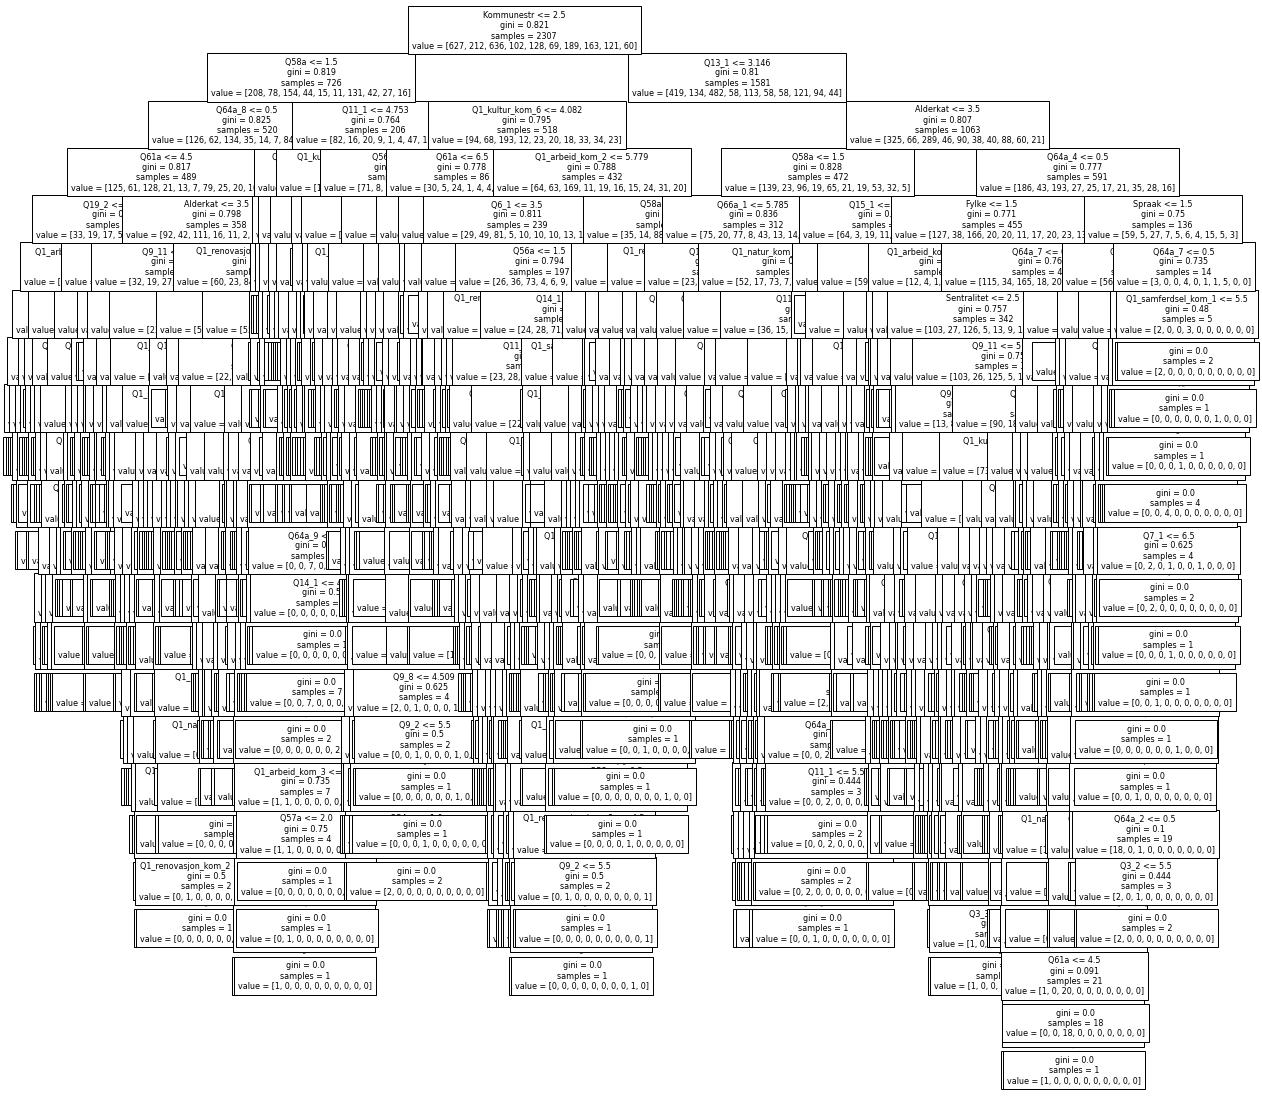

In [30]:
import matplotlib.pyplot as plt
#print(list(train.drop(['Q16'],axis=1)))
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=list(train.drop(['Q16'],axis=1)))

In [ ]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))